In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sklearn as sk
from datetime import datetime
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [66]:
# reading data files
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [5]:
#To get the columns name 
col_names = df.columns
for i in df.columns :
    print (i)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [6]:
print ('Number of rows i.e records present ',df.shape[0], '\n','number of columns i.e feature present',df.shape[1])

Number of rows i.e records present  119390 
 number of columns i.e feature present 32


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


# inference from five point statistical summary 
- Agent column and company column contain NAN values 
- Adr column contain outliers for example '5400'
- skewed distribution is likly present in most of the columns 
- children column also comtain some nan values and outliers 
- lead time columns also showes presence of outlier and long tail on right side 
- adr columns shows entries shows 'Zero' what its means need to be understand correctly 
- adr is showing negative values also , need to understand what negative adr means or its a miss typed error 




### Cleaning ReservatonStatusDate
Extracting the Year, Month and Date from the ReservationStatusDate and concating it to the dataframe and dropping the ReservationStatusDate
This datetime extraction gives us better features

In [9]:
# changing reservation_status_date to date time object using pandas 

df.reservation_status_date =(pd.to_datetime(df.reservation_status_date))

In [10]:
# extracting the date month and year of reservation into seprate column 
df['ReservationStatusDate_year'] = df.reservation_status_date.dt.day.astype(int)
df['ReservationStatusDate_month'] = df.reservation_status_date.dt.month.astype(int)
df['ReservationStatusDate_day'] = df.reservation_status_date.dt.year.astype(int)

In [11]:
df = df.drop('reservation_status_date',axis=1)

In [12]:
# claculating the duration of stay and creating new column 
df['stay'] = df.stays_in_week_nights + df.stays_in_weekend_nights


In [13]:
df_cat = df.select_dtypes('object')

In [14]:
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [15]:
df_cat.describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


# summery of from categroical column 
- Two different type of hotel data is present and city hotels frequency is 79330
- 5 different meal package is provided by hoteliers and bed and breakfast plan is opted  92310 by customers 
- out of 8 market segment online TA booking are 56477 
- TA/TO occurs 97870 times which is the most from 5 distribution chanels 
- Room type A is booked most of the time and assigned A type most 
- Customer bookings are mostly without deposite
- transient cusstomers are most 89613 
- resevation status check-out only for 75166 cutomers out of 119390

In [16]:
df[['stay','adr','adults','total_of_special_requests','required_car_parking_spaces','customer_type','meal','country','market_segment','assigned_room_type','days_in_waiting_list']]

,stay,adr,adults,total_of_special_requests,required_car_parking_spaces,customer_type,meal,country,market_segment,assigned_room_type,days_in_waiting_list
0,0,0.00,2,0,0,Transient,BB,PRT,Direct,C,0
1,0,0.00,2,0,0,Transient,BB,PRT,Direct,C,0
2,1,75.00,1,0,0,Transient,BB,GBR,Direct,C,0
3,1,75.00,1,0,0,Transient,BB,GBR,Corporate,A,0
4,2,98.00,2,1,0,Transient,BB,GBR,Online TA,A,0
...,...,...,...,...,...,...,...,...,...,...,...
119385,7,96.14,2,0,0,Transient,BB,BEL,Offline TA/TO,A,0
119386,7,225.43,3,2,0,Transient,BB,FRA,Online TA,E,0
119387,7,157.71,2,4,0,Transient,BB,DEU,Online TA,D,0
119388,7,104.40,2,0,0,Transient,BB,GBR,Online TA,A,0


In [17]:
df[df.stay==7]['adr']

24         94.95
25         63.60
26         79.50
27        107.00
28         94.00
           ...  
119384     96.14
119385     96.14
119386    225.43
119387    157.71
119388    104.40
Name: adr, Length: 8655, dtype: float64

In [18]:
print ('NAN values present in agent column ',df.agent.isna().sum(), '\n percentage of NAN values ', df.agent.isna().sum()/df.shape[0])

NAN values present in agent column  16340 
 percentage of NAN values  0.13686238378423654


In [19]:
print ('NAN values present in company column ',df.company.isna().sum(), '\n percentage of NAN values ', df.company.isna().sum()/df.shape[0])

NAN values present in company column  112593 
 percentage of NAN values  0.943068933746545


In [20]:
# we can drop company column as it NAN percentage is very high also we can drop agent column 
df = df.drop('company',axis=1)

In [21]:
df = df.drop('agent',axis=1)

In [22]:
print ('NAN values present in children column ',df.children.isna().sum())

NAN values present in children column  4


In [23]:
# imputing NAN values with 0
df.children = df.children.fillna(0)

In [24]:
print ('NAN values present in children column ',df.children.isna().sum())

NAN values present in children column  0


In [25]:
# dropping outlier from adr column 
df. drop(df[df.adr==5400].index, axis=0, inplace=True)

In [26]:
df[df.adr==5400]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,ReservationStatusDate_year,ReservationStatusDate_month,ReservationStatusDate_day,stay


In [27]:
chk_df = df[['adr','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','arrival_date_year']]

In [28]:
chk_df[chk_df.arrival_date_month=='August']

,adr,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,arrival_date_year
842,96.30,August,31,1,2015
843,118.06,August,31,1,2015
844,118.06,August,31,1,2015
845,154.00,August,31,1,2015
846,202.00,August,31,1,2015
...,...,...,...,...,...
119385,96.14,August,35,30,2017
119386,225.43,August,35,31,2017
119387,157.71,August,35,31,2017
119388,104.40,August,35,31,2017


In [29]:
chk_df.arrival_date_year.value_counts()

2016    56706
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [30]:
print ('% Customer arrival in 2015',chk_df[chk_df.arrival_date_year==2015].arrival_date_year.value_counts()/df.shape[0]*100)

% Customer arrival in 2015 2015    18.423808
Name: arrival_date_year, dtype: float64


In [31]:
print ('% Customer arrival in 2016',chk_df[chk_df.arrival_date_year==2016].arrival_date_year.value_counts()/df.shape[0]*100)

% Customer arrival in 2016 2016    47.496838
Name: arrival_date_year, dtype: float64


In [32]:
print ('% Customer arrival in 2017',chk_df[chk_df.arrival_date_year==2017].arrival_date_year.value_counts()/df.shape[0]*100)

% Customer arrival in 2017 2017    34.079354
Name: arrival_date_year, dtype: float64


In [33]:
df_2015 = df[df.arrival_date_year == 2015]
df_2016 = df[df.arrival_date_year == 2016]
df_2017 = df[df.arrival_date_year == 2017]

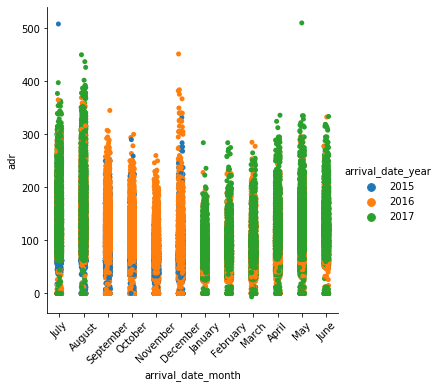

In [36]:
plot_ = sns.catplot(x = 'arrival_date_month',y = 'adr', hue='arrival_date_year', data = chk_df)
plot_.set_xticklabels(rotation=45)
plt.savefig(('adr_vs_month_and year.jpg'))

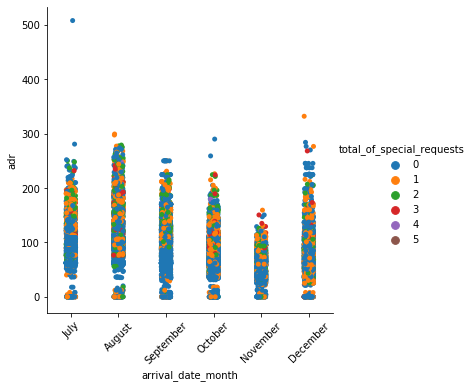

In [37]:
plot_ = sns.catplot(x = 'arrival_date_month',y = 'adr', hue='total_of_special_requests', data = df_2015)
plot_.set_xticklabels(rotation=45)
plt.savefig('2015_adr_vs_month_and_spr.jpg')

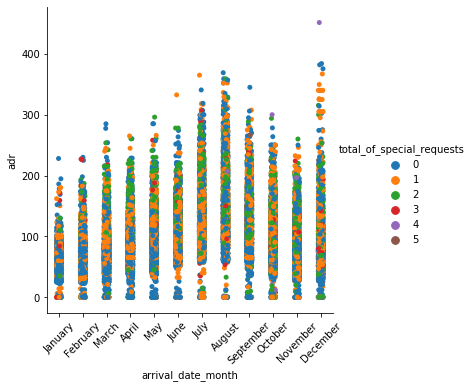

In [38]:
plot_ = sns.catplot(x = 'arrival_date_month',y = 'adr', hue='total_of_special_requests', data = df_2016)
plot_.set_xticklabels(rotation=45)
plt.savefig('2016_adr_vs_month_and_spr.jpg')

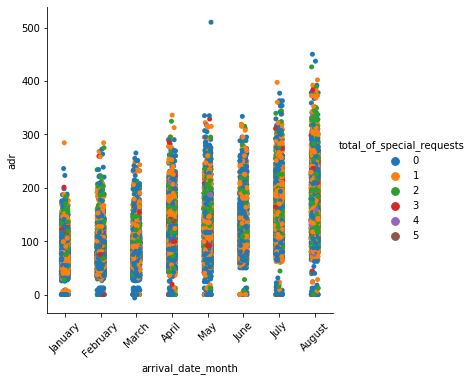

In [53]:
plot_ = sns.catplot(x = 'arrival_date_month',y = 'adr', hue='total_of_special_requests', data = df_2017)
plot_.set_xticklabels(rotation=45)
plt.savefig('2017_adr_vs_month_and_spr.jpg')

In [39]:
df[df.babies>0 ]['total_of_special_requests']

109       2
111       2
165       2
236       2
264       3
         ..
118437    0
118571    1
118794    2
119098    2
119106    0
Name: total_of_special_requests, Length: 917, dtype: int64

In [40]:
df[df.children >0]['total_of_special_requests']

13        1
45        0
55        2
65        0
87        2
         ..
119270    2
119287    0
119293    3
119318    0
119319    1
Name: total_of_special_requests, Length: 8590, dtype: int64

In [41]:
df.babies.sum()

949

In [42]:
df[df.adr==10]['stay']

11687     7
24004    11
26244     3
28093     7
29260     7
80784     4
Name: stay, dtype: int64

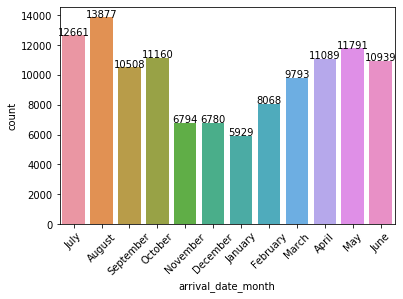

In [64]:
ax =sns.countplot(df['arrival_date_month'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
plt.xticks(rotation=45)
plt.savefig('month.jpg')

In [43]:
df[df.adr==5400]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,ReservationStatusDate_year,ReservationStatusDate_month,ReservationStatusDate_day,stay


In [44]:
cal = df.stay * df.adr

In [45]:
cal.min()

-63.8

In [46]:
df = df[df.adr !=5400]

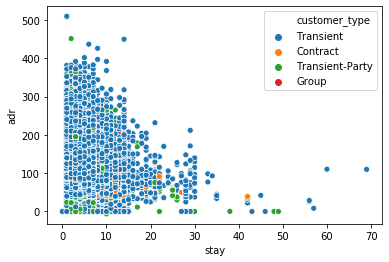

In [40]:
plot_ = sns.scatterplot(x = 'stay',y = 'adr', hue = 'customer_type',data = df)
#plot_.set_xticklabels(rotation=45)
plt.savefig('stay_vs_adr.jpg')

In [67]:
aa = df[['total_of_special_requests','babies','children','adults']]

In [68]:
ck_babies = aa[aa.total_of_special_requests>0]

In [69]:
ck_babies[ck_babies.babies>0]

,total_of_special_requests,babies,children,adults
109,2,1,0.0,2
111,2,1,0.0,2
165,2,1,0.0,2
236,2,1,0.0,2
264,3,2,0.0,2
...,...,...,...,...
118265,1,1,2.0,2
118423,1,1,0.0,2
118571,1,1,0.0,2
118794,2,1,0.0,2


In [75]:
df['y'] = df['total_of_special_requests'].apply(lambda x : '0' if (x!=0) else '1' )

In [76]:
df.y.value_counts()

1    70318
0    49072
Name: y, dtype: int64

In [53]:
df.y.value_counts()
    

1    70317
0    49072
Name: y, dtype: int64

In [70]:
cols_to_corr = ['stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children', 'babies','adr']

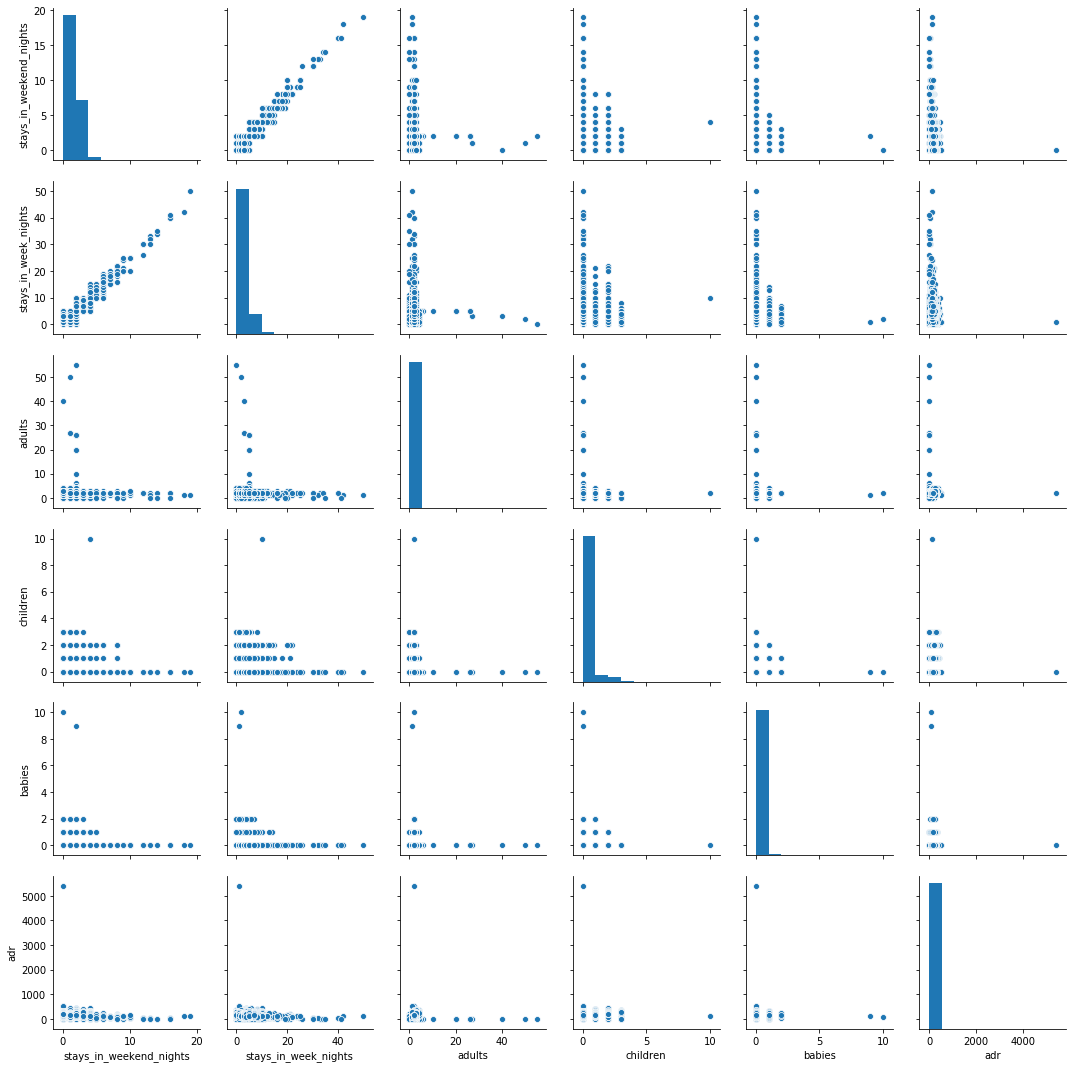

In [73]:
sns.pairplot(df[cols_to_corr])
plt.savefig('pairplot_map.jpg')

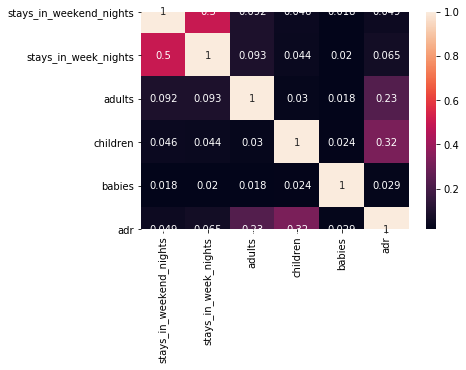

In [72]:
sns.heatmap(df[cols_to_corr].corr(),annot=True)
plt.savefig('heat_map.jpg')

In [57]:
drop_col = ['stays_in_weekend_nights','is_canceled', 'reservation_status','stays_in_week_nights']

In [58]:
df = df.drop(drop_col, axis=1)
df = df.drop('total_of_special_requests',axis=1)

In [59]:
df = df.dropna()

In [60]:
# Label
y = df.y
# Features

X = df.drop('y', axis=1)


In [61]:
X = pd.get_dummies(X)

In [62]:
X.shape

(118901, 256)

In [63]:
# Diving the dataset into Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [64]:
lr = LogisticRegression()
# training a linear model
lr.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# predicting values
pred = lr.predict(X_test)

# plotting results
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[ 9006  3270]
 [ 4858 12592]]
              precision    recall  f1-score   support

           0       0.65      0.73      0.69     12276
           1       0.79      0.72      0.76     17450

    accuracy                           0.73     29726
   macro avg       0.72      0.73      0.72     29726
weighted avg       0.73      0.73      0.73     29726



In [66]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:

# predicting values
pred_rf = rf_model.predict(X_test)

# plotting results
print(confusion_matrix(y_test, pred_rf))

print(classification_report(y_test, pred_rf))

[[10059  2217]
 [ 3735 13715]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77     12276
           1       0.86      0.79      0.82     17450

    accuracy                           0.80     29726
   macro avg       0.80      0.80      0.80     29726
weighted avg       0.81      0.80      0.80     29726



In [68]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [69]:
feature_importances[:9]

,importance
lead_time,0.091761
adr,0.085377
arrival_date_day_of_month,0.064370
ReservationStatusDate_year,0.063801
arrival_date_week_number,0.051453
ReservationStatusDate_month,0.048437
market_segment_Online TA,0.047656
stay,0.045904
deposit_type_No Deposit,0.036928


In [70]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [71]:
# init model
rfc_final=RandomForestClassifier()

# init grid searching
CV_rfc = GridSearchCV(estimator=rfc_final, param_grid=param_grid,
                      cv=2, verbose=5, n_jobs=-1)

In [72]:
# begin grid search
CV_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed: 10.5min remaining:   57.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 11.7min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [73]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 500}

In [74]:
# predicting values
pred_rf_b = CV_rfc.predict(X_test)

# plotting results
print(confusion_matrix(y_test, pred_rf_b))

print(classification_report(y_test, pred_rf_b))

[[10034  2242]
 [ 2951 14499]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79     12276
           1       0.87      0.83      0.85     17450

    accuracy                           0.83     29726
   macro avg       0.82      0.82      0.82     29726
weighted avg       0.83      0.83      0.83     29726



In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [76]:

bclf = AdaBoostClassifier(base_estimator=clf,n_estimators=clf.n_estimators)

In [ ]:
bclf.fit(X_train, y_train)

dt = bclf.predict(X_test)

In [ ]:
# plotting results
print(confusion_matrix(y_test, pred_rf_b))

print(classification_report(y_test, pred_rf_b))